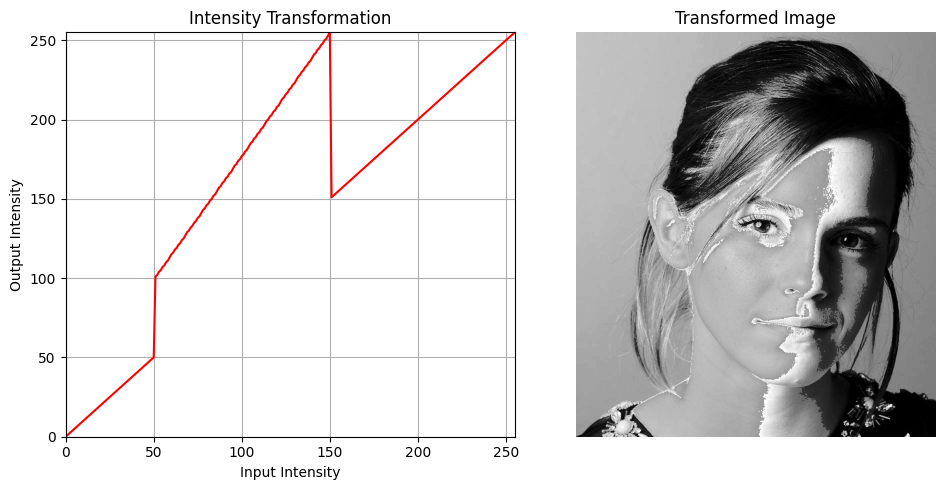

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define control points for intensity transformation
control_points = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

# Generate intensity mappings based on control points
# Segment 1: From 0 to 50
segment1 = np.linspace(0, control_points[0, 1], control_points[0, 1] + 1).astype('uint8')

# Segment 2: From 51 to 100
segment2 = np.linspace(control_points[0, 1] + 1, control_points[1, 1], control_points[1, 0] - control_points[0, 0]).astype('uint8')

# Segment 3: From 101 to 150
segment3 = np.linspace(control_points[1, 1] + 1, control_points[2, 1], control_points[2, 0] - control_points[1, 0]).astype('uint8')

# Segment 4: From 151 to 150 (this is redundant and should be checked)
segment4 = np.linspace(control_points[2, 1] + 1, control_points[3, 1], control_points[3, 0] - control_points[2, 0]).astype('uint8')

# Segment 5: From 151 to 255
segment5 = np.linspace(control_points[3, 1] + 1, 255, 255 - control_points[3, 0]).astype('uint8')

# Concatenate all segments into a single transformation array
transformation_array = np.concatenate((segment1, segment2), axis=0)
transformation_array = np.concatenate((transformation_array, segment3), axis=0)
transformation_array = np.concatenate((transformation_array, segment4), axis=0)
transformation_array = np.concatenate((transformation_array, segment5), axis=0)

# Load the original grayscale image
original_image = cv.imread("E:/GitHub Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/emma.jpg", cv.IMREAD_GRAYSCALE)

# Apply the intensity transformation using the lookup table
transformed_image = cv.LUT(original_image, transformation_array)

# Create a subplot for displaying the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the intensity transformation curve
ax[0].plot(transformation_array, 'r', label='Transformation Curve')
ax[0].set_title('Intensity Transformation')
ax[0].grid(True)
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xlabel('Input Intensity')
ax[0].set_ylabel('Output Intensity')

# Display the transformed image
ax[1].imshow(transformed_image, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Transformed Image')

# Show the plots
plt.tight_layout()
plt.show()
